In [1]:
import sys
sys.path.append("../..")  # Add pyMotifFinder in the search path

In [2]:
import time

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pyMotifFinder as pmf

Load a Network as a `networkx.DiGraph` object (it should work also with an undirected graph).

In [4]:
regulations_file = "ColiNet-1.1/coliInterFullVec.txt"

graph = nx.DiGraph()
for line in open(regulations_file, "r"):
    if line.startswith("#"):
        continue
    source, target, mode = line.strip().split()
    graph.add_edge(source, target)

Find motifs!!

In [5]:
t = time.time()
motifs = pmf.find_motifs(graph, size=3, min_occurrences=5, rand_networks=1000, ping_every=10)
print "It took {:.3f} seconds".format(time.time()-t)

0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 
It took 567.858 seconds


We are returned a list with tupels that contain, for each motif, a `networkx.DiGraph` with the topology, a count of the times it was found in the explored network, and an estimation of the probability of finding at least as many instances in a randomized network.

We can visualize the results, but first we need a way to tell if a node has a selfloop or not. It is a current limitation of the plotting functions of `networkx` that they do not support selfloops. We will use a custom function to change the color of the node depending on the presence of a selfloop.

In [6]:
def draw_with_selfloops(graph, color="YellowGreen", color_selfloop="Green",
                        **kwargs):
    selfloops = set(motif_graph.nodes_with_selfloops())
    node_colors = [color if nod in selfloops else color_selfloop
                   for nod in graph.nodes_iter()]
    return  nx.draw(motif_graph, ax=axes[i],
                    pos=nx.drawing.nx_agraph.graphviz_layout(motif_graph, prog="dot"),
                    node_color=node_colors)

And now we can visualize the results:

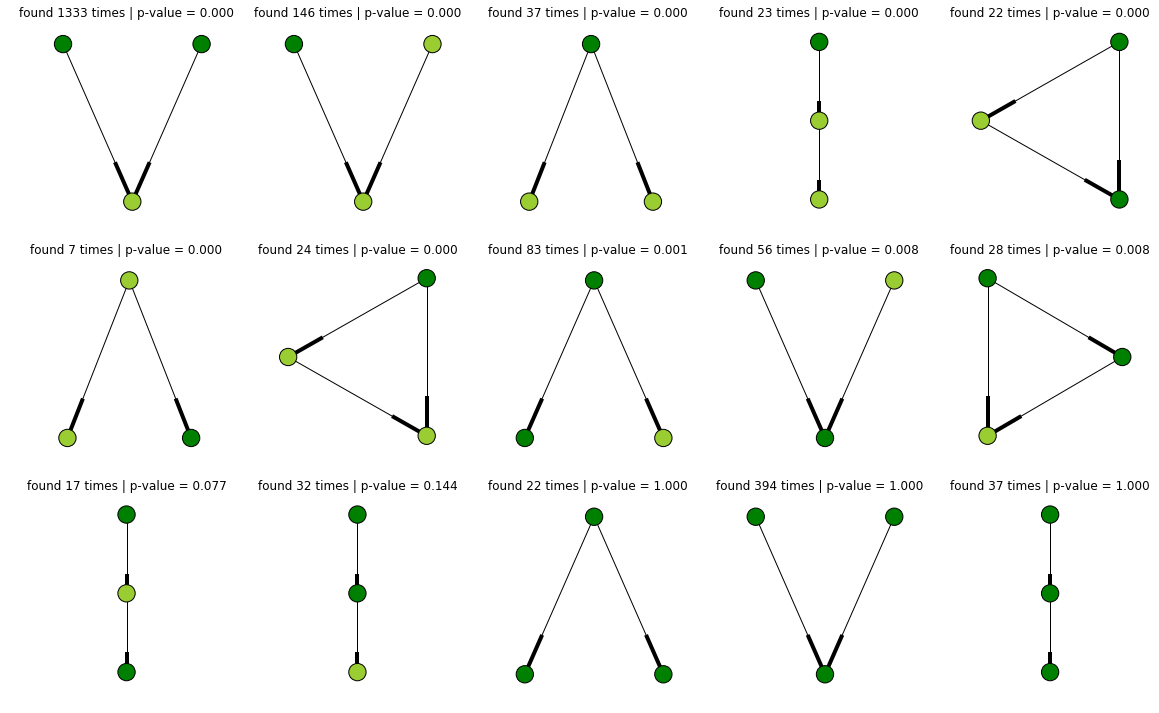

In [7]:
num_motifs = len(motifs)

ncols = 5
nrows = num_motifs//ncols + (num_motifs%ncols != 0)
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 4*nrows))
axes = axes.ravel()
for i in range(num_motifs):
    motif_graph, num, pval = motifs[i]
    draw_with_selfloops(motif_graph)
    axes[i].set_title("found {} times | p-value = {:.3f}".format(num, pval))
[axes[j].axis('off') for j in range(i, len(axes))]
plt.show()